In [142]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("brewery").getOrCreate()
from pyspark.sql.functions import col
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from pyspark.sql.types import DecimalType


In [95]:
# importing csv file exrtracted from hive using bucket
path = 'gs://hive_final_project/final_beer_data00.csv'

df1 = spark.read.csv(path, inferSchema = True, header = False)

In [96]:
df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)



In [97]:
path = 'gs://hive_final_project/final_beer_data00.csv'

df2 = spark.read.csv(path, inferSchema = True, header = False)

In [98]:
path = 'gs://hive_final_project/final_beer_data01.csv'

df3 = spark.read.csv(path, inferSchema = True, header = False)

In [99]:
path = 'gs://hive_final_project/final_beer_data02.csv'

df4 = spark.read.csv(path, inferSchema = True, header = False)

In [100]:
path = 'gs://hive_final_project/final_beer_data03.csv'

df5 = spark.read.csv(path, inferSchema = True, header = False)

In [101]:
path = 'gs://hive_final_project/final_beer_data04.csv'

df6 = spark.read.csv(path, inferSchema = True, header = False)

In [102]:
path = 'gs://hive_final_project/final_beer_data05.csv'

df7 = spark.read.csv(path, inferSchema = True, header = False)

In [103]:
# concatinating all the dataframe to single dataframe for furthrer analysis
df_beer = df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7)

In [111]:
df_beer.show(1)

+-------+-------------------+----------+----+----------+----+------------------+----------------+-----------------+------------------+------------------+-----------------+------------------+
|    _c0|                _c1|       _c2| _c3|       _c4| _c5|               _c6|             _c7|              _c8|               _c9|              _c10|             _c11|              _c12|
+-------+-------------------+----------+----+----------+----+------------------+----------------+-----------------+------------------+------------------+-----------------+------------------+
|7870796|2020-01-01 00:00:19|Wheat Beer|Kegs|Whitefield|4666|2664.7593448382822|8.57701633109399|89.19588216376087|4.1049876591878345|3.2354851724654683|4.663204448186049|12.003677279839351|
+-------+-------------------+----------+----+----------+----+------------------+----------------+-----------------+------------------+------------------+-----------------+------------------+
only showing top 1 row



In [112]:
# adding header
header_values = ["Batch_ID", "Brew_Date", "Beer_Style", "SKU", "Location", "Volume_Produced", "Total_Sales", "Quality_Score", "Brewhouse_Efficiency", "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging", "Total_Loss"] 

In [113]:
for i, header in enumerate(header_values):
    # withColumnRenamed is used to rename coilumn
    df_beer = df_beer.withColumnRenamed(f"_c{i}", header)


In [114]:
df_beer.show(2)

+--------+-------------------+----------+----+----------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+------------------+
|Batch_ID|          Brew_Date|Beer_Style| SKU|  Location|Volume_Produced|       Total_Sales|    Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|        Total_Loss|
+--------+-------------------+----------+----+----------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+------------------+
| 7870796|2020-01-01 00:00:19|Wheat Beer|Kegs|Whitefield|           4666|2664.7593448382822| 8.57701633109399|   89.19588216376087| 4.1049876591878345|      3.2354851724654683|           4.663204448186049|12.003677279839351|
| 9810411|2020-01-01 00:00:31|      Sour|Kegs|Whitefield|            832| 9758.801062471319|7.420540

In [115]:
# verifying updated header
df_beer.printSchema()

root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)
 |-- Total_Loss: double (nullable = true)



In [122]:
# calculationg average beer loss from differernt stage
average_loss = df_beer.agg({'Loss_During_Brewing':'avg','Loss_During_Fermentation':'avg', 'Loss_During_Bottling_Kegging':'avg'})

In [124]:
print("Below table shows averages percentage of beer loss during brewing, fermentation and keeging bottle")
average_loss.show()

Below table shows averages percentage of beer loss during brewing, fermentation and keeging bottle


+------------------------+-----------------------------+---------------------------------+
|avg(Loss_During_Brewing)|avg(Loss_During_Fermentation)|avg(Loss_During_Bottling_Kegging)|
+------------------------+-----------------------------+---------------------------------+
|      2.9998217022994766|           3.0000885273856563|               3.0000577513888165|
+------------------------+-----------------------------+---------------------------------+



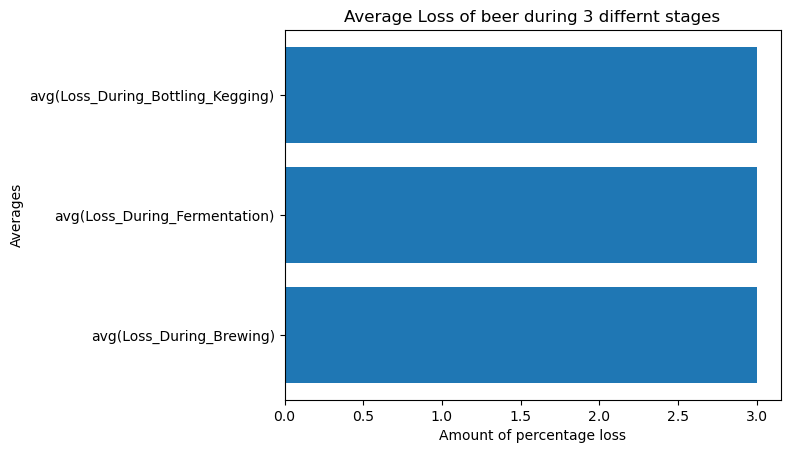

In [131]:
#collect is used to retrive whole reltaion (average_loss)
# extracting data from 0th index which in this case is first row
average_loss_collected = average_loss.collect()[0]

# Extract the column names and corresponding average values
# here .keys is used to fetch key from the dictionary which in this case is name of losses
columns = list(average_loss_collected.asDict().keys())
#.values is used to fetch values from the dictioary which in this case is integer/value of averages losses
averages = list(average_loss_collected.asDict().values())

# defining chart type here it is horizhontal bar graph
plt.barh(columns, averages)
# adding title to graph
plt.title('Average Loss of beer during 3 differnt stages')
# labeling axis
plt.xlabel('Amount of percentage loss')
plt.ylabel('Averages')
plt.show()

In [152]:
#Converted total_sales to decimal type from double that has 12 digit and 2 digit after decimal point
df_beer = df_beer.withColumn('Total_Sales', df_beer['Total_Sales'].cast(DecimalType(12, 2)))


In [153]:
# finding total sales of each location
location_sales = df_beer.groupBy('Location').agg({'Total_Sales':'sum'})

In [154]:
location_sales.show()

+---------------+----------------+
|       Location|sum(Total_Sales)|
+---------------+----------------+
|    Malleswaram|  10674491290.83|
|    Indiranagar|  10664427253.09|
|      Jayanagar|  10693192461.86|
|Electronic City|  10659503629.29|
|      Yelahanka|  10684308462.42|
|    Rajajinagar|  10683740918.56|
|    Koramangala|  10668282860.24|
|     HSR Layout|  10687808054.19|
|     Whitefield|  10675121146.17|
|   Marathahalli|  10670651628.11|
+---------------+----------------+



In [155]:
# finding total volume of beer produced by each location
location_volume = df_beer.groupBy('Location').agg({'Volume_Produced':'sum'})

In [156]:
location_volume.show()

+---------------+--------------------+
|       Location|sum(Volume_Produced)|
+---------------+--------------------+
|    Indiranagar|          2795615365|
|    Malleswaram|          2794354315|
|      Jayanagar|          2800357447|
|Electronic City|          2790809763|
|      Yelahanka|          2798556872|
|    Rajajinagar|          2796221532|
|    Koramangala|          2794734563|
|     HSR Layout|          2796345203|
|     Whitefield|          2795661108|
|   Marathahalli|          2794195724|
+---------------+--------------------+



In [161]:
# creating new column Ratio_sales_Volume to calculate ratio of total_sales to Volume_produced
ratio = df_beer.withColumn('Ratio_sales_Volume', F.col('Total_Sales') / F.col('Volume_Produced'))

In [164]:
ratio_sum = ratio.groupBy('Location').agg({'Ratio_sales_volume':'sum'})

In [165]:
ratio_sum.show()

+---------------+-----------------------+
|       Location|sum(Ratio_sales_volume)|
+---------------+-----------------------+
|    Malleswaram|   5467063.599013896...|
|    Indiranagar|   5453074.096007006...|
|      Jayanagar|   5476392.854612150...|
|Electronic City|   5462801.548539145...|
|      Yelahanka|   5464192.246188051...|
|    Rajajinagar|   5471321.273216670...|
|    Koramangala|   5454323.390795804...|
|     HSR Layout|   5476069.583062455...|
|     Whitefield|   5460265.125165878...|
|   Marathahalli|   5462889.011970837...|
+---------------+-----------------------+



In [166]:
descendin_ratio = ratio_sum.orderBy(F.desc('sum(Ratio_sales_volume)'))


In [167]:
top_5 = descendin_ratio.limit(5)

In [169]:
top_5.show()

+-----------+-----------------------+
|   Location|sum(Ratio_sales_volume)|
+-----------+-----------------------+
|  Jayanagar|   5476392.854612150...|
| HSR Layout|   5476069.583062455...|
|Rajajinagar|   5471321.273216670...|
|Malleswaram|   5467063.599013896...|
|  Yelahanka|   5464192.246188051...|
+-----------+-----------------------+



In [172]:
# finding average quality score for each beer_style
quality_score_avg = df_beer.groupBy('Beer_Style').agg({'Quality_Score':'avg'})

In [173]:
quality_score_avg.show()

+----------+------------------+
|Beer_Style|avg(Quality_Score)|
+----------+------------------+
|    Porter| 8.000309784008325|
|      Sour| 8.000590239154757|
|     Lager| 7.999750988299226|
|Wheat Beer| 8.000242635505243|
|   Pilsner|7.9981537664126385|
|       Ale|7.9994311880062225|
|     Stout|  7.99934783094765|
|       IPA| 8.000416191622326|
+----------+------------------+



In [176]:
descending_quality = quality_score_avg.orderBy(F.desc('avg(Quality_Score)'))


In [180]:
top_3 = descending_quality.limit(3)

In [181]:
top_3.show()

+----------+------------------+
|Beer_Style|avg(Quality_Score)|
+----------+------------------+
|      Sour| 8.000590239154759|
|       IPA| 8.000416191622326|
|    Porter| 8.000309784008323|
+----------+------------------+



In [182]:
# ploting bar chart for above result
# using same logic as used before
top_3_data = top_3.select('Beer_Style', 'avg(Quality_Score)').collect()


In [183]:
beer_styles = [row['Beer_Style'] for row in top_3_data]
avg_quality_scores = [row['avg(Quality_Score)'] for row in top_3_data]


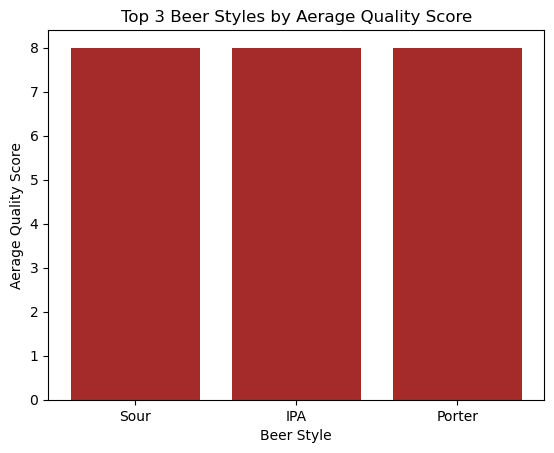

In [185]:
# definng specific colour to plot bars ini graph
plt.bar(beer_styles, avg_quality_scores, color='brown')

# labeling and adding title to graph
plt.title('Top 3 Beer Styles by Aerage Quality Score')
plt.xlabel('Beer Style')
plt.ylabel('Aerage Quality Score')
plt.show()